# 05. forecast(시계열 분석)

## 1. 배경 및 설치
- 윈도우 : Visual C++ Build Tool 설치
    - conda install pandas-datareader
    - conda install -c conda-forge fbprophet
        - pip install fbprophet
    

In [4]:
pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/88/d6/ebc199ba1fd99719c8680b3fb90663aa4888871364c69bbf9629148b9724/prophet-1.1.4-py3-none-win_amd64.whl.metadata
     ---------------------------------------- 0.0/83.2 kB ? eta -:--:--
     ---------------------------------------- 83.2/83.2 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.9 MB 8.3 MB/s eta 0:00:02
   - -------------------------------------- 0.6/12.9 MB 6.2 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/12.9 MB 4.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.9/12.9 MB 4.9 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/12.9 MB 5.0 MB/s eta 0:00:03
   --- ------------------------------------ 1.2/12.9 MB 4.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.4/12.9 MB 4.4 MB/s eta 0:00:03
   ----- -------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires setuptools-git>=1.2, which is not installed.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.1.0 which is incompatible.


In [6]:
from pandas_datareader import data
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [7]:
pip install plotly


  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/d6/54/a8759957b778094233d7058c8ddbe368504b448ffe9c26a85f7bfd53584e/plotly-5.16.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
    --------------------------------------- 0.3/15.6 MB 5.7 MB/s eta 0:00:03
    --------------------------------------- 0.4/15.6 MB 4.9 MB/s eta 0:00:04
   - -------------------------------------- 0.6/15.6 MB 4.1 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/15.6 MB 4.1 MB/s eta 0:00:04
   -- ------------------------------------- 1.1/15.6 MB 4.6 MB/s eta 0:00:04
   --- ------------------------------------ 1.4/15.6 MB 4.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/15.6 MB 5.0 MB/s eta 0:00:03
   ---- ----------------------------------- 1.8/15.6 MB 4.9 MB/s eta 0:00:03
   ----- ---------------------------------- 2.2/15.6 MB 5.1 MB/s eta 0:00:03
   ------ ------------------------

In [8]:
from pandas_datareader import data
from prophet import Prophet

***

## 함수(def)의 기초

In [9]:
def test_def(a,b):
    return a+b # return을 해줘야 다른 곳에서 사용할 수 있음

In [10]:
test_def(2,3)

5

In [11]:
a = 1 #전역변수

def edit_a(i):
    a = i #지역변수

In [12]:
edit_a(2)
a

1

In [13]:
a = 1 #전역변수

def edit_a(i):
    global a
    a = i #지역변수

In [14]:
edit_a(2)
a

2

- global 변수를 def 내에서 사용하고 싶다면 global로 선언
- def 내에서의 변수와 밖에서의 변수는 같은 이름이어도 같은 것이 아님

$$ y = asin(2\pi ft + t_0) + b $$

In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [18]:
def plotSinWave(amp, freq, endTime, sampleTime, startTime, bias):
    '''
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    '''
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias
    
    plt.figure(figsize = (12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()

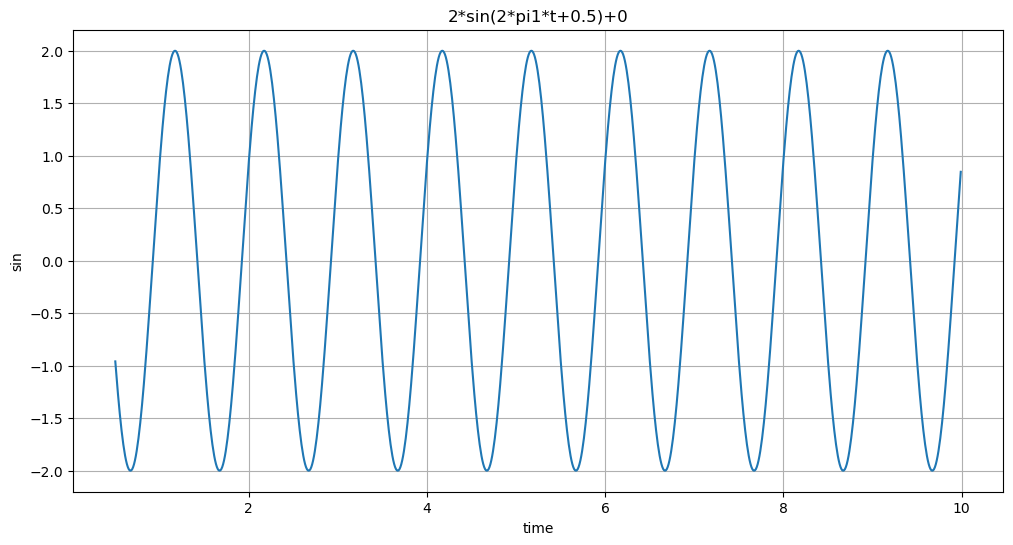

In [19]:
plotSinWave(2,1,10,0.01,0.5,0)

In [26]:
## **변수명 을 이용해 사용자가 직접 옵션명과 같이 값을 설정해주면 그 값을 이용하고
## 아니면 기본값을 이용해 계산됨

def plotSinWave(**kwargs):
    '''
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    '''
                        # 옵션명 , 기본값
    endTime = kwargs.get("endTime", 1)
    sampleTime = kwargs.get("sampleTime", 0.01)
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    startTime =kwargs.get("startTime", 0)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12,6))
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias
    
    plt.figure(figsize = figsize)
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title("함수 : " + str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()

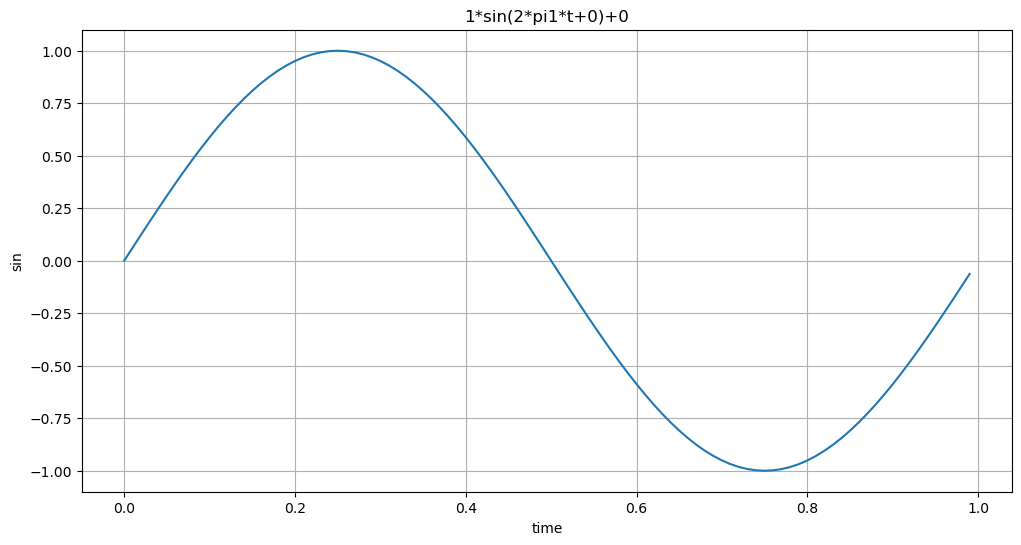

In [21]:
plotSinWave() # 기본값이 설정이 되어있기 때문에 함수 선언만 해도 오류가 없음

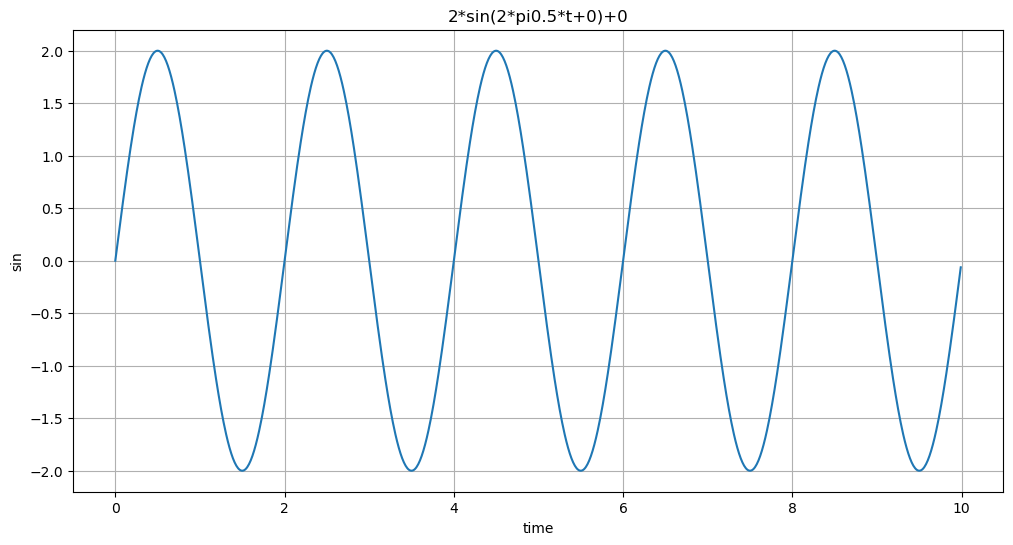

In [22]:
plotSinWave(amp = 2, freq = 0.5, endTime = 10)

In [28]:
import set_matplotlib_hangul

Text(0.5, 1.0, '한글')

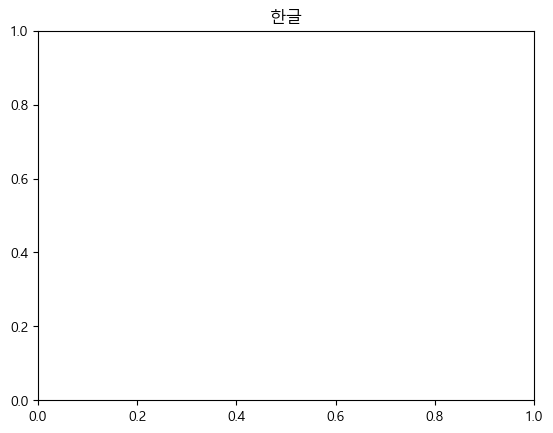

In [29]:
plt.title("한글")

***

In [30]:
## 2. fbprophet 기초

In [31]:
import pandas as pd
import numpy as np
import set_matplotlib_hangul

### 1

In [32]:
time = np.linspace(0,1,365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range("2018-01-01", periods = 365*2, freq = "D")
df = pd.DataFrame({"ds" : ds, "y" : result})
df.head()

,ds,y
0,2018-01-01,0.000000
1,2018-01-02,0.103243
2,2018-01-03,0.205382
3,2018-01-04,0.305326
4,2018-01-05,0.402007


<Axes: >

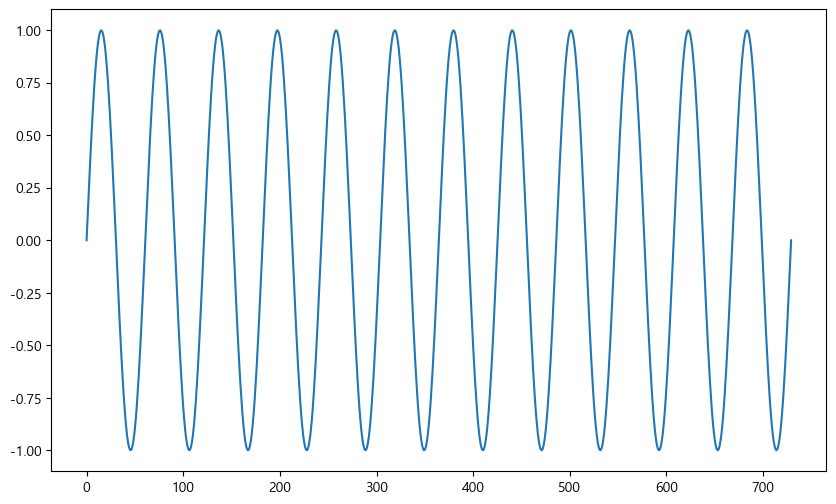

In [34]:
df["y"].plot(figsize = (10,6))

In [36]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df) # 우리가 만든 데이터를 집어넣어 학습시킴

15:27:55 - cmdstanpy - INFO - Chain [1] start processing
15:27:55 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
future = m.make_future_dataframe(periods = 30) #30일 간의 데이터를 예측해봐라
forecast = m.predict(future) #예측값 저장

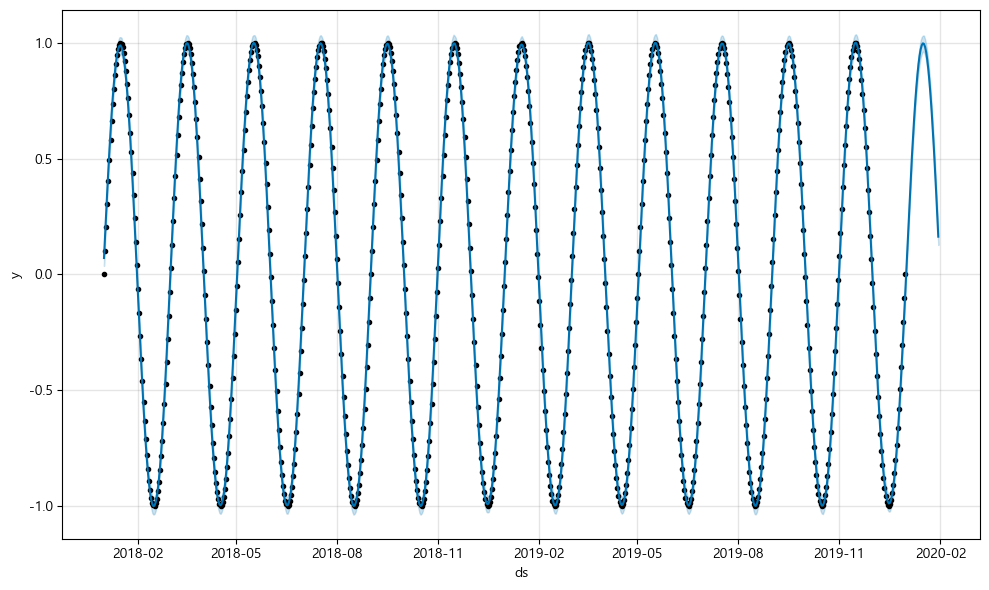

In [39]:
m.plot(forecast); #점이 찍혀있지 않은 그래프 부분이 학습에 의한 예측값 부분!

### 2

<Axes: >

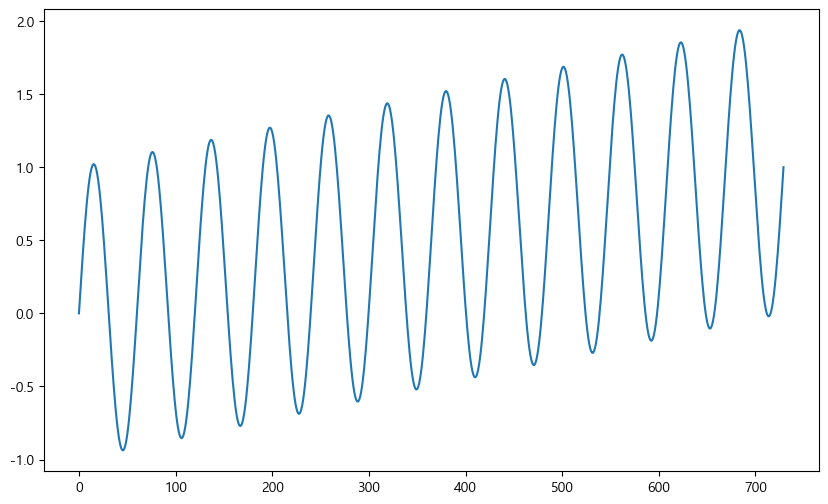

In [40]:
time = np.linspace(0,1,365*2)
result = np.sin(2*np.pi*12*time) + time

ds = pd.date_range("2018-01-01", periods = 365*2, freq = "D")
df = pd.DataFrame({"ds" : ds, "y" : result})

df["y"].plot(figsize = (10,6))

15:31:30 - cmdstanpy - INFO - Chain [1] start processing
15:31:30 - cmdstanpy - INFO - Chain [1] done processing


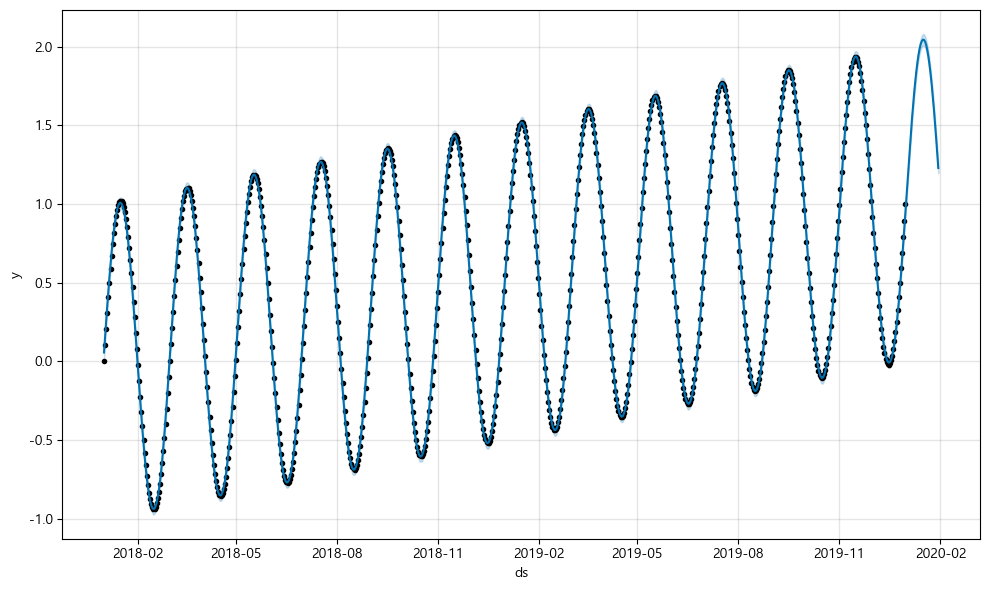

In [41]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df) # 우리가 만든 데이터를 집어넣어 학습시킴
future = m.make_future_dataframe(periods = 30) #30일 간의 데이터를 예측해봐라
forecast = m.predict(future) #예측값 저장

m.plot(forecast); #점이 찍혀있지 않은 그래프 부분이 학습에 의한 예측값 부분!

### 3

<Axes: >

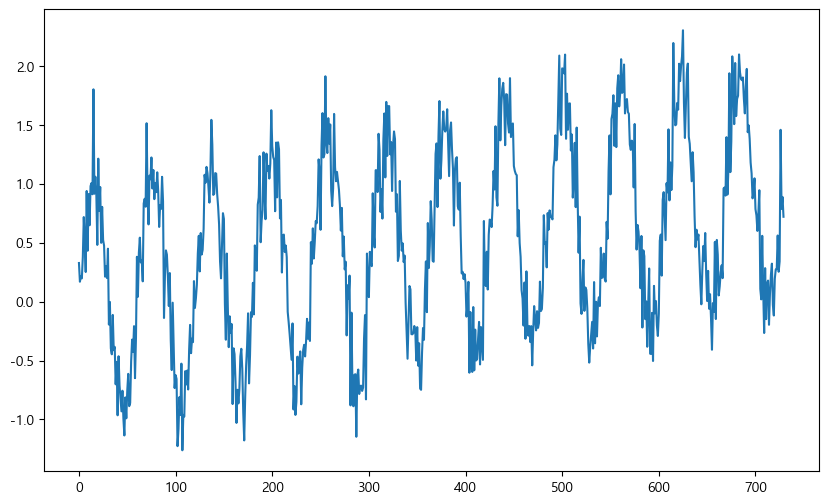

In [43]:
time = np.linspace(0,1,365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4 #노이즈를 추가

ds = pd.date_range("2018-01-01", periods = 365*2, freq = "D")
df = pd.DataFrame({"ds" : ds, "y" : result})

df["y"].plot(figsize = (10,6))

15:32:29 - cmdstanpy - INFO - Chain [1] start processing
15:32:30 - cmdstanpy - INFO - Chain [1] done processing


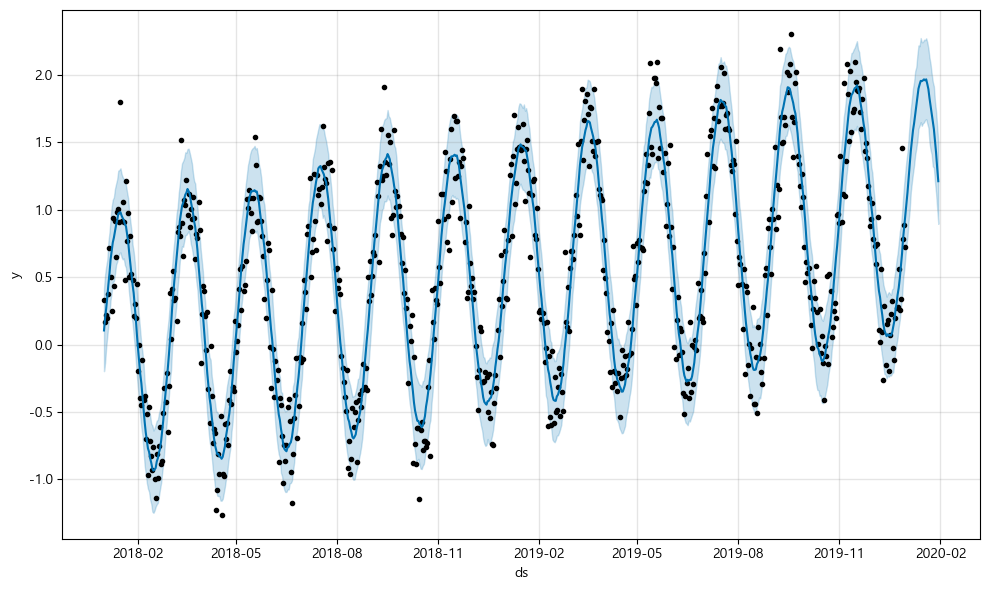

In [44]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df) # 우리가 만든 데이터를 집어넣어 학습시킴
future = m.make_future_dataframe(periods = 30) #30일 간의 데이터를 예측해봐라
forecast = m.predict(future) #예측값 저장

m.plot(forecast); #점이 찍혀있지 않은 그래프 부분이 학습에 의한 예측값 부분!

---

## 3. 시계열 데이터 실전 이용해보기

In [46]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import set_matplotlib_hangul

from prophet import Prophet
from datetime import datetime

In [47]:
pinkwink_web = pd.read_csv(
    "../data/05_PinkWink_Web_Traffic.csv",
    encoding = "utf-8",
    thousands = ",",
    names = ["date", "hit"],
    index_col = 0
)
(pinkwink_web["hit"].isnull()).sum()

1

In [48]:
pinkwink_web[pinkwink_web["hit"].isnull()] # 모든 데이터가 nan인 데이터가 포함되어있어 삭제

,hit
date,
NaN,NaN


In [49]:
pinkwink_web = pinkwink_web[pinkwink_web["hit"].notnull()]
pinkwink_web

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0
...,...
17. 6. 26.,1309.0
17. 6. 27.,1436.0
17. 6. 28.,1387.0


<Axes: xlabel='date'>

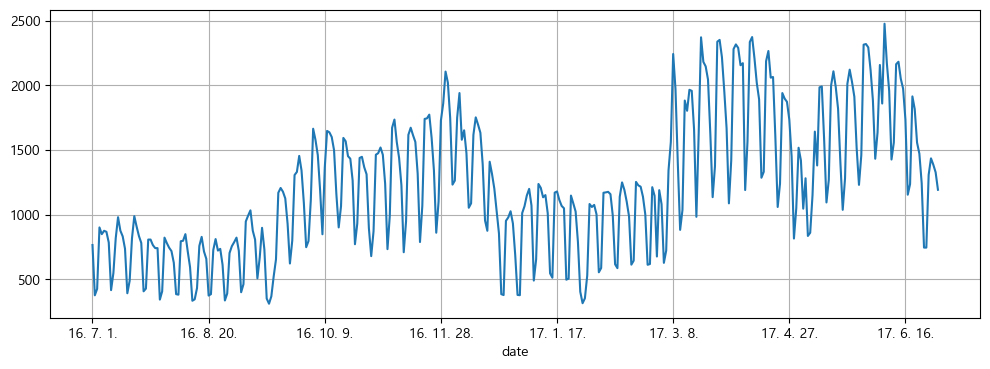

In [50]:
# 전체 데이터 그려보기
pinkwink_web["hit"].plot(
    figsize = (12,4),
    grid = True

)

In [51]:
# trend 분석을 시각화하기 위한 x축 값 만들기
time = np.arange(0,len(pinkwink_web)) # 날짜 데이터 개수만큼의 x축 데이터 만들기

In [52]:
traffic = pinkwink_web["hit"].values #y값
fx = np.linspace(0,time[-1], 1000) #0부터 x마지막 데이터 사이에서 1000개의 데이터 추출

In [53]:
# 에러를 계산할 함수(RMSE)
def error(f, x, y):
    return np.sqrt(np.mean((f(x) - y) ** 2))

In [54]:
# prophet을 사용하기 전, 이전 시간에 배웠던 회귀 직선을 이용해 추측해보자.

fp1 = np.polyfit(time, traffic, 1) # 1차식
f1 = np.poly1d(fp1) # 위에서 구한 값들로 다항식을 생성해줌

fp2 = np.polyfit(time, traffic, 2) # 2차식
f2 = np.poly1d(fp2)

fp3 = np.polyfit(time, traffic, 3) # 3차식
f3 = np.poly1d(fp3)

fp15 = np.polyfit(time, traffic, 15) # 15차식
f15 = np.poly1d(fp15)

In [55]:
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.62841018946943
429.53280466762925
330.47773081609824


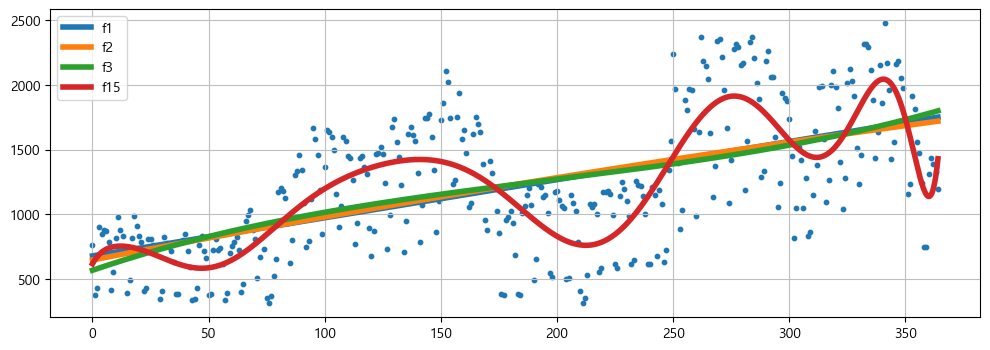

In [56]:
plt.figure(figsize = (12,4))
plt.scatter(time, traffic, s = 10)
plt.plot(fx, f1(fx), lw = 4, label = "f1")
plt.plot(fx, f2(fx), lw = 4, label = "f2")
plt.plot(fx, f3(fx), lw = 4, label = "f3")
plt.plot(fx, f15(fx), lw = 4, label = "f15")

plt.grid(True, linestyle = '-', color = "0.75")
plt.legend(loc = 2)
plt.show()

In [59]:
# Prophet 으로 예측해보기

df = pd.DataFrame({"ds" : pinkwink_web.index, "y" : pinkwink_web['hit']})
df.reset_index(inplace = True)
df["ds"] = pd.to_datetime(df["ds"], format = "%y. %m. %d.") # 날짜 형식 변환
del df['date']
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [60]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
# 데이터 학습
m.fit(df) 
# 60일에 해당하는 데이터 생성
future = m.make_future_dataframe(periods = 60)
# 예측 결과는 상한/하한의 범위를 포함해서 얻어짐
forecast = m.predict(future) 

forecast #결과로 얻어지는 해당 열들에 대한 설명을 찾고 싶은데 못 찾겠다ㅠ

16:07:20 - cmdstanpy - INFO - Chain [1] start processing
16:07:20 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-07-01,825.393371,522.190450,932.815373,825.393371,825.393371,-91.245430,-91.245430,-91.245430,239.398087,239.398087,239.398087,-51.466564,-51.466564,-51.466564,-279.176954,-279.176954,-279.176954,0.0,0.0,0.0,734.147941
1,2016-07-02,826.217654,87.306925,517.024302,826.217654,826.217654,-523.627712,-523.627712,-523.627712,239.398087,239.398087,239.398087,-467.554829,-467.554829,-467.554829,-295.470970,-295.470970,-295.470970,0.0,0.0,0.0,302.589942
2,2016-07-03,827.041937,210.969526,626.528712,827.041937,827.041937,-404.662924,-404.662924,-404.662924,239.398087,239.398087,239.398087,-335.383604,-335.383604,-335.383604,-308.677407,-308.677407,-308.677407,0.0,0.0,0.0,422.379013
3,2016-07-04,827.866220,757.033950,1179.240716,827.866220,827.866220,137.696837,137.696837,137.696837,239.398087,239.398087,239.398087,217.312307,217.312307,217.312307,-319.013557,-319.013557,-319.013557,0.0,0.0,0.0,965.563057
4,2016-07-05,828.690503,780.534684,1215.547869,828.690503,828.690503,166.140195,166.140195,166.140195,239.398087,239.398087,239.398087,253.481258,253.481258,253.481258,-326.739150,-326.739150,-326.739150,0.0,0.0,0.0,994.830698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2017-08-25,1171.591495,697.320494,1113.863580,1171.591469,1171.591524,-270.193116,-270.193116,-270.193116,239.398087,239.398087,239.398087,-51.466564,-51.466564,-51.466564,-458.124639,-458.124639,-458.124639,0.0,0.0,0.0,901.398379
421,2017-08-26,1172.415774,286.562484,699.601948,1172.415747,1172.415804,-686.149366,-686.149366,-686.149366,239.398087,239.398087,239.398087,-467.554829,-467.554829,-467.554829,-457.992624,-457.992624,-457.992624,0.0,0.0,0.0,486.266408
422,2017-08-27,1173.240052,398.108562,824.585719,1173.240024,1173.240083,-554.311993,-554.311993,-554.311993,239.398087,239.398087,239.398087,-335.383604,-335.383604,-335.383604,-458.326476,-458.326476,-458.326476,0.0,0.0,0.0,618.928059
423,2017-08-28,1174.064330,971.193104,1390.916750,1174.064302,1174.064362,-2.330264,-2.330264,-2.330264,239.398087,239.398087,239.398087,217.312307,217.312307,217.312307,-459.040658,-459.040658,-459.040658,0.0,0.0,0.0,1171.734066


In [61]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,901.398379,697.320494,1113.863580
421,2017-08-26,486.266408,286.562484,699.601948
422,2017-08-27,618.928059,398.108562,824.585719
423,2017-08-28,1171.734066,971.193104,1390.916750
424,2017-08-29,1207.743873,1006.521975,1428.907742


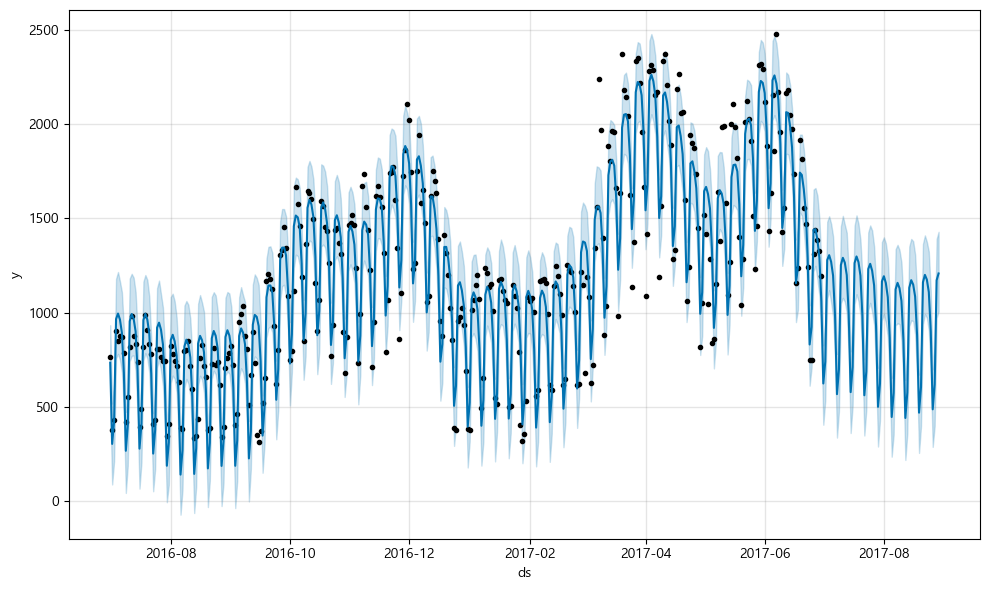

In [64]:
m.plot(forecast);

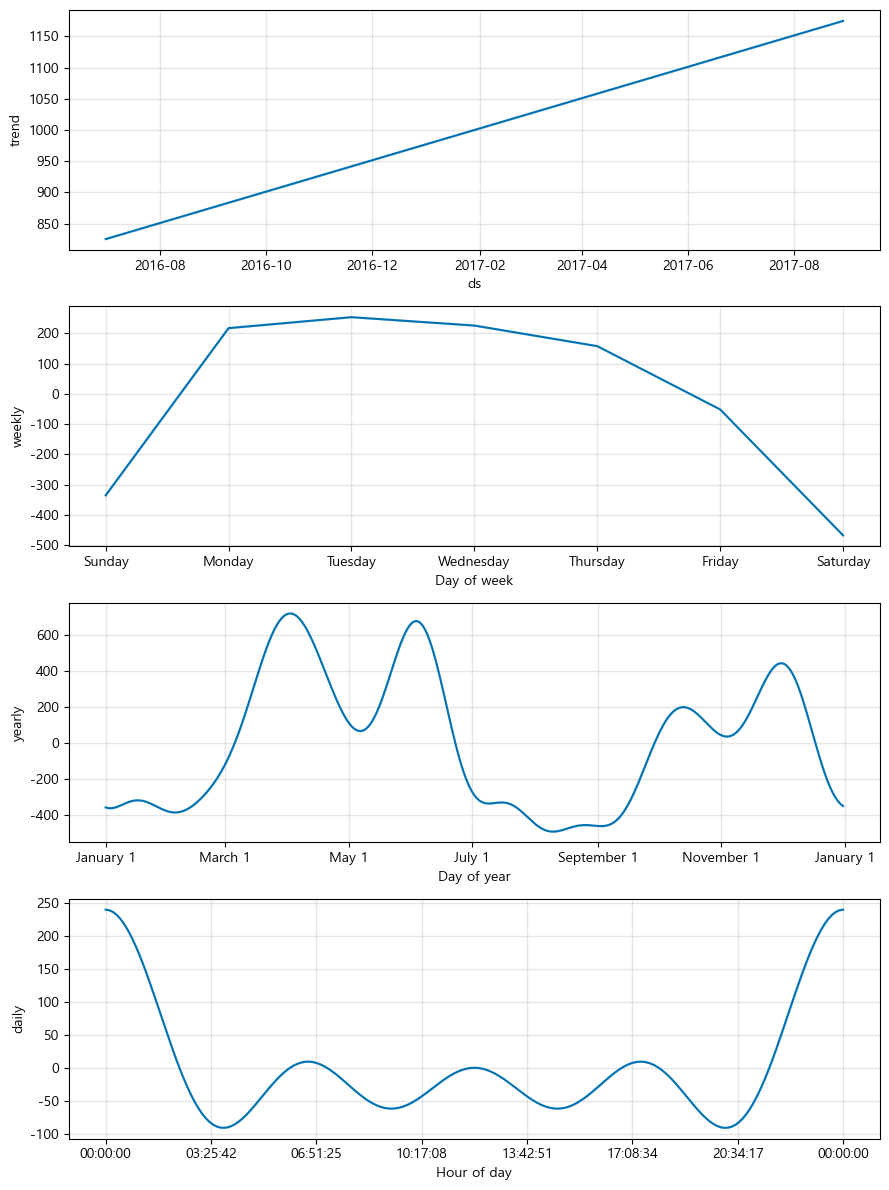

In [66]:
# 각 주제에 맞는 경향을 파악할 수 있음
m.plot_components(forecast);

In [68]:
"""
# 에러를 계산할 함수(RMSE)
def error(f, x, y):
    return np.sqrt(np.mean((f(x) - y) ** 2))
"""

np.sqrt(np.mean((forecast["yhat"] - df["y"]) ** 2))

164.2453293522153